In [1]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

import re
import nltk
import string
import spacy
import heapq

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import HTML
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Uday\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Uday\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Uday\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:


output_string = StringIO()
with open('D:/EXELR/data set/EBOOK/The 7 Habits.pdf', 'rb') as in_file:
    parser = PDFParser(in_file)
    doc = PDFDocument(parser)
    rsrcmgr = PDFResourceManager()
    device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    for page in PDFPage.create_pages(doc):
        interpreter.process_page(page)

print(output_string.getvalue())

Copyright
The	7	Habits	of	Highly	Effective	People	Copyright	©	1989,	2004	by	Stephen	R.
Covey	All	rights	reserved,	including	the	right	of	reproduction	in	whole	or	in	part
in	any	form.

Cover	art	to	the	electronic	edition	copyright	©	2009	by	RosettaBooks,	LLC

Excerpt	of	“Little	Giddings”	from	Four	Quartets,	copyright	1943	by	T.S.	Eliot
and	renewed	1971	by	Esme	Valerie	Eliot,	reprinted	by	permission	of	Harcourt
Brace	Jovanovich,	Inc.

First	electronic	edition	published	2009	by	RosettaBooks	LLC,	New	York.
ISBN	Kindle	edition:	9780795309199
ISBN	Mobipocket	edition:	9780795309205

											To	my	colleagues,
										Empowered
										And	Empowering

	

	

ACKNOWLEDGMENTS
	

Interdependence	is	a	higher	value	than	independence.

This	 work	 is	 a	 synergistic	 product	 of	 many	 minds.	 It	 began	 in	 the
middle	seventies	as	I	was	reviewing	200	years	of	success	literature	as
part	 of	 a	 doctoral	 program.	 I	 am	 grateful	 for	 the	 inspiration	 and
wisdom	 of	 many	 thinkers	 and	 f

In [3]:
original_text=output_string.getvalue()
original_text

'\x0cCopyright\nThe\t7\tHabits\tof\tHighly\tEffective\tPeople\tCopyright\t©\t1989,\t2004\tby\tStephen\tR.\nCovey\tAll\trights\treserved,\tincluding\tthe\tright\tof\treproduction\tin\twhole\tor\tin\tpart\nin\tany\tform.\n\nCover\tart\tto\tthe\telectronic\tedition\tcopyright\t©\t2009\tby\tRosettaBooks,\tLLC\n\nExcerpt\tof\t“Little\tGiddings”\tfrom\tFour\tQuartets,\tcopyright\t1943\tby\tT.S.\tEliot\nand\trenewed\t1971\tby\tEsme\tValerie\tEliot,\treprinted\tby\tpermission\tof\tHarcourt\nBrace\tJovanovich,\tInc.\n\nFirst\telectronic\tedition\tpublished\t2009\tby\tRosettaBooks\tLLC,\tNew\tYork.\nISBN\tKindle\tedition:\t9780795309199\nISBN\tMobipocket\tedition:\t9780795309205\n\n\x0c\t\t\t\t\t\t\t\t\t\t\tTo\tmy\tcolleagues,\n\t\t\t\t\t\t\t\t\t\tEmpowered\n\t\t\t\t\t\t\t\t\t\tAnd\tEmpowering\n\n\t\n\n\x0c\t\n\nACKNOWLEDGMENTS\n\t\n\nInterdependence\tis\ta\thigher\tvalue\tthan\tindependence.\n\nThis\t work\t is\t a\t synergistic\t product\t of\t many\t minds.\t It\t began\t in\t the\nmiddle\tse

In [4]:
original_text = re.sub(r'\s+', ' ', original_text)
original_text

' Copyright The 7 Habits of Highly Effective People Copyright © 1989, 2004 by Stephen R. Covey All rights reserved, including the right of reproduction in whole or in part in any form. Cover art to the electronic edition copyright © 2009 by RosettaBooks, LLC Excerpt of “Little Giddings” from Four Quartets, copyright 1943 by T.S. Eliot and renewed 1971 by Esme Valerie Eliot, reprinted by permission of Harcourt Brace Jovanovich, Inc. First electronic edition published 2009 by RosettaBooks LLC, New York. ISBN Kindle edition: 9780795309199 ISBN Mobipocket edition: 9780795309205 To my colleagues, Empowered And Empowering ACKNOWLEDGMENTS Interdependence is a higher value than independence. This work is a synergistic product of many minds. It began in the middle seventies as I was reviewing 200 years of success literature as part of a doctoral program. I am grateful for the inspiration and wisdom of many thinkers and for the trans-generational sources and roots of this wisdom. I am also grate

In [5]:
text = re.sub(r'[^\w\s]', '', original_text)

In [6]:
text

' Copyright The 7 Habits of Highly Effective People Copyright  1989 2004 by Stephen R Covey All rights reserved including the right of reproduction in whole or in part in any form Cover art to the electronic edition copyright  2009 by RosettaBooks LLC Excerpt of Little Giddings from Four Quartets copyright 1943 by TS Eliot and renewed 1971 by Esme Valerie Eliot reprinted by permission of Harcourt Brace Jovanovich Inc First electronic edition published 2009 by RosettaBooks LLC New York ISBN Kindle edition 9780795309199 ISBN Mobipocket edition 9780795309205 To my colleagues Empowered And Empowering ACKNOWLEDGMENTS Interdependence is a higher value than independence This work is a synergistic product of many minds It began in the middle seventies as I was reviewing 200 years of success literature as part of a doctoral program I am grateful for the inspiration and wisdom of many thinkers and for the transgenerational sources and roots of this wisdom I am also grateful for many students fri

In [7]:

#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words
print(stopwords)

{'never', 'being', 'doing', 'anyway', 'due', 'many', 'his', 'below', 'their', 'these', 'please', 'anything', 'down', 'until', 'call', 'upon', 'formerly', 'afterwards', 'nevertheless', 'wherein', '‘d', 'quite', 'and', '‘m', 'become', 'keep', 'against', 'done', 'thru', 'all', 'himself', 'n’t', 'under', '’re', 'above', 'still', 'various', 'or', 'were', 'along', 'only', 'twelve', 'amongst', 'four', 'further', 'own', 'bottom', 'again', 'hundred', 'otherwise', 'per', 'ourselves', 'seemed', 'up', 'forty', 'front', 'myself', 'nor', 'her', 'side', 'for', 'then', 'else', 'a', 'three', 'so', 'regarding', 'although', 'among', 'eleven', 'name', 'thence', 'an', 'since', 'full', 'made', 'while', 'part', 'because', 'more', 'your', 'toward', 'thereupon', '‘re', 'throughout', 'before', 'whenever', 'one', 'sixty', 'every', 'between', 'yourselves', 'somewhere', 'of', 'did', 'yet', 'herein', 'perhaps', 'whose', 'how', 'without', 'each', 'me', "'re", 'twenty', 'few', "'ll", 'indeed', 'who', 'anyone', 'seems

In [8]:
def preprocess(text):
  formatted_text = text.lower()
  tokens = []
  for token in nltk.word_tokenize(formatted_text):
    tokens.append(token)
  #print(tokens)
  tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
  formatted_text = ' '.join(element for element in tokens)

  return formatted_text

In [9]:
formatted_text = preprocess(text)
formatted_text

'copyright 7 habits highly effective people copyright 1989 2004 stephen r covey rights reserved including right reproduction form cover art electronic edition copyright 2009 rosettabooks llc excerpt little giddings quartets copyright 1943 ts eliot renewed 1971 esme valerie eliot reprinted permission harcourt brace jovanovich inc electronic edition published 2009 rosettabooks llc new york isbn kindle edition 9780795309199 isbn mobipocket edition 9780795309205 colleagues empowered empowering acknowledgments interdependence higher value independence work synergistic product minds began middle seventies reviewing 200 years success literature doctoral program grateful inspiration wisdom thinkers transgenerational sources roots wisdom grateful students friends colleagues brigham young university covey leadership center thousands adults parents youth executives teachers clients tested material given feedback encouragement material arrangement slowly evolved imbued sincerely deeply immersed co

In [10]:
word_frequency = nltk.FreqDist(nltk.word_tokenize(formatted_text))
word_frequency

FreqDist({'people': 310, 'life': 183, 'time': 175, 'things': 155, 'principles': 144, 'personal': 128, 'work': 125, 'way': 121, 'dont': 121, 'want': 112, ...})

In [11]:
highest_frequency = max(word_frequency.values())
highest_frequency

310

In [12]:
for word in word_frequency.keys():
  #print(word)
  word_frequency[word] = (word_frequency[word] / highest_frequency)

In [13]:
word_frequency

FreqDist({'people': 1.0, 'life': 0.5903225806451613, 'time': 0.5645161290322581, 'things': 0.5, 'principles': 0.4645161290322581, 'personal': 0.4129032258064516, 'work': 0.4032258064516129, 'way': 0.3903225806451613, 'dont': 0.3903225806451613, 'want': 0.36129032258064514, ...})

In [14]:
sentence_list = nltk.sent_tokenize(original_text)
sentence_list

[' Copyright The 7 Habits of Highly Effective People Copyright © 1989, 2004 by Stephen R. Covey All rights reserved, including the right of reproduction in whole or in part in any form.',
 'Cover art to the electronic edition copyright © 2009 by RosettaBooks, LLC Excerpt of “Little Giddings” from Four Quartets, copyright 1943 by T.S.',
 'Eliot and renewed 1971 by Esme Valerie Eliot, reprinted by permission of Harcourt Brace Jovanovich, Inc. First electronic edition published 2009 by RosettaBooks LLC, New York.',
 'ISBN Kindle edition: 9780795309199 ISBN Mobipocket edition: 9780795309205 To my colleagues, Empowered And Empowering ACKNOWLEDGMENTS Interdependence is a higher value than independence.',
 'This work is a synergistic product of many minds.',
 'It began in the middle seventies as I was reviewing 200 years of success literature as part of a doctoral program.',
 'I am grateful for the inspiration and wisdom of many thinkers and for the trans-generational sources and roots of thi

In [15]:
sentence_new=[]
for i in range(len(sentence_list)):
    if int(len(sentence_list[i]))<500:
        sentence_new.append(sentence_list[i])

In [16]:
sentence_new

[' Copyright The 7 Habits of Highly Effective People Copyright © 1989, 2004 by Stephen R. Covey All rights reserved, including the right of reproduction in whole or in part in any form.',
 'Cover art to the electronic edition copyright © 2009 by RosettaBooks, LLC Excerpt of “Little Giddings” from Four Quartets, copyright 1943 by T.S.',
 'Eliot and renewed 1971 by Esme Valerie Eliot, reprinted by permission of Harcourt Brace Jovanovich, Inc. First electronic edition published 2009 by RosettaBooks LLC, New York.',
 'ISBN Kindle edition: 9780795309199 ISBN Mobipocket edition: 9780795309205 To my colleagues, Empowered And Empowering ACKNOWLEDGMENTS Interdependence is a higher value than independence.',
 'This work is a synergistic product of many minds.',
 'It began in the middle seventies as I was reviewing 200 years of success literature as part of a doctoral program.',
 'I am grateful for the inspiration and wisdom of many thinkers and for the trans-generational sources and roots of thi

In [17]:
len(sentence_new)

3443

In [18]:
score_sentences = {}
for sentence in sentence_new:
  #print(sentence)
  for word in nltk.word_tokenize(sentence.lower()):
    #print(word)
    if sentence not in score_sentences.keys():
      score_sentences[sentence] = word_frequency[word]
    else:
      score_sentences[sentence] += word_frequency[word]

In [19]:
score_sentences

{' Copyright The 7 Habits of Highly Effective People Copyright © 1989, 2004 by Stephen R. Covey All rights reserved, including the right of reproduction in whole or in part in any form.': 2.0161290322580645,
 'Cover art to the electronic edition copyright © 2009 by RosettaBooks, LLC Excerpt of “Little Giddings” from Four Quartets, copyright 1943 by T.S.': 0.2838709677419355,
 'Eliot and renewed 1971 by Esme Valerie Eliot, reprinted by permission of Harcourt Brace Jovanovich, Inc. First electronic edition published 2009 by RosettaBooks LLC, New York.': 0.2903225806451613,
 'ISBN Kindle edition: 9780795309199 ISBN Mobipocket edition: 9780795309205 To my colleagues, Empowered And Empowering ACKNOWLEDGMENTS Interdependence is a higher value than independence.': 0.48709677419354847,
 'This work is a synergistic product of many minds.': 0.4935483870967742,
 'It began in the middle seventies as I was reviewing 200 years of success literature as part of a doctoral program.': 0.5516129032258065

In [20]:

best_sentences = heapq.nlargest(int(len(sentence_new) * 0.2), score_sentences, key = score_sentences.get)

In [21]:
best_sentences

['I have had the opportunity to work with many people—wonderful people, talented people, people who deeply want to achieve happiness and success, people who are searching, people who are hurting.',
 'I’ve heard from literally thousands of people who say things like this: “I learned to focus on truly important things, not just urgent things.” “I listen-really listen-to other people for the first time.” “Since I started thinking win-win in a job that was killing me, I’ve found a new mission and purpose in my professional life.” How will The 7 Habits impact you?',
 'Even in the midst of people or circumstances that seem to ignore the principles, we can be secure in the knowledge that principles are bigger than people or circumstances, and that thousands of years of history have seen them triumph, time and time again.',
 'DAVID STARR JORDAN In more than 25 years of working with people in business, university, and marriage and family settings, I have come in contact with many individuals wh

In [22]:
len(best_sentences)

688

In [23]:
print('-----------------------------------------SUMMARY BASED ON IMPORTANCE OF SENTENCE-------------------------------------')
summary = ' '.join(best_sentences)
summary

-----------------------------------------SUMMARY BASED ON IMPORTANCE OF SENTENCE-------------------------------------


'I have had the opportunity to work with many people—wonderful people, talented people, people who deeply want to achieve happiness and success, people who are searching, people who are hurting. I’ve heard from literally thousands of people who say things like this: “I learned to focus on truly important things, not just urgent things.” “I listen-really listen-to other people for the first time.” “Since I started thinking win-win in a job that was killing me, I’ve found a new mission and purpose in my professional life.” How will The 7 Habits impact you? Even in the midst of people or circumstances that seem to ignore the principles, we can be secure in the knowledge that principles are bigger than people or circumstances, and that thousands of years of history have seen them triumph, time and time again. DAVID STARR JORDAN In more than 25 years of working with people in business, university, and marriage and family settings, I have come in contact with many individuals who have achiev

In [24]:
text = ''
display(HTML(f'<h2>Summary highlighted from the book</h2>'))
for sentence in sentence_list:
  #print(sentence)
  #text += sentence
  if sentence in best_sentences:
    text += ' ' + sentence.replace(sentence, f"<mark>{sentence}</mark>")
  else:
    text += ' ' + sentence

display(HTML(f"""{text}"""))

In [25]:
len(text)


372027

In [26]:
len(summary)

119017

In [27]:
#clean summary




# Define a function to clean the text
def clean(summary):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', summary) 
    return summary

print(summary)


I have had the opportunity to work with many people—wonderful people, talented people, people who deeply want to achieve happiness and success, people who are searching, people who are hurting. I’ve heard from literally thousands of people who say things like this: “I learned to focus on truly important things, not just urgent things.” “I listen-really listen-to other people for the first time.” “Since I started thinking win-win in a job that was killing me, I’ve found a new mission and purpose in my professional life.” How will The 7 Habits impact you? Even in the midst of people or circumstances that seem to ignore the principles, we can be secure in the knowledge that principles are bigger than people or circumstances, and that thousands of years of history have seen them triumph, time and time again. DAVID STARR JORDAN In more than 25 years of working with people in business, university, and marriage and family settings, I have come in contact with many individuals who have achieve

In [28]:
# Remove punctuation
summary = re.sub(r'[^\w\s]', '', summary)
summary

'I have had the opportunity to work with many peoplewonderful people talented people people who deeply want to achieve happiness and success people who are searching people who are hurting Ive heard from literally thousands of people who say things like this I learned to focus on truly important things not just urgent things I listenreally listento other people for the first time Since I started thinking winwin in a job that was killing me Ive found a new mission and purpose in my professional life How will The 7 Habits impact you Even in the midst of people or circumstances that seem to ignore the principles we can be secure in the knowledge that principles are bigger than people or circumstances and that thousands of years of history have seen them triumph time and time again DAVID STARR JORDAN In more than 25 years of working with people in business university and marriage and family settings I have come in contact with many individuals who have achieved an incredible degree of outw

In [29]:

from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
 

 
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(summary)
 
filtered_summary = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_summary = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_summary.append(w)
 
print(word_tokens)
print(filtered_summary)

['I', 'have', 'had', 'the', 'opportunity', 'to', 'work', 'with', 'many', 'peoplewonderful', 'people', 'talented', 'people', 'people', 'who', 'deeply', 'want', 'to', 'achieve', 'happiness', 'and', 'success', 'people', 'who', 'are', 'searching', 'people', 'who', 'are', 'hurting', 'Ive', 'heard', 'from', 'literally', 'thousands', 'of', 'people', 'who', 'say', 'things', 'like', 'this', 'I', 'learned', 'to', 'focus', 'on', 'truly', 'important', 'things', 'not', 'just', 'urgent', 'things', 'I', 'listenreally', 'listento', 'other', 'people', 'for', 'the', 'first', 'time', 'Since', 'I', 'started', 'thinking', 'winwin', 'in', 'a', 'job', 'that', 'was', 'killing', 'me', 'Ive', 'found', 'a', 'new', 'mission', 'and', 'purpose', 'in', 'my', 'professional', 'life', 'How', 'will', 'The', '7', 'Habits', 'impact', 'you', 'Even', 'in', 'the', 'midst', 'of', 'people', 'or', 'circumstances', 'that', 'seem', 'to', 'ignore', 'the', 'principles', 'we', 'can', 'be', 'secure', 'in', 'the', 'knowledge', 'that',

In [30]:
# Removing stopwards
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','The']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in filtered_summary if not word in my_stop_words]
print(no_stop_tokens)

['opportunity', 'work', 'many', 'peoplewonderful', 'people', 'talented', 'people', 'people', 'deeply', 'want', 'achieve', 'happiness', 'success', 'people', 'searching', 'people', 'hurting', 'Ive', 'heard', 'literally', 'thousands', 'people', 'say', 'things', 'like', 'learned', 'focus', 'truly', 'important', 'things', 'urgent', 'things', 'listenreally', 'listento', 'people', 'first', 'time', 'Since', 'started', 'thinking', 'winwin', 'job', 'killing', 'Ive', 'found', 'new', 'mission', 'purpose', 'professional', 'life', 'How', '7', 'Habits', 'impact', 'Even', 'midst', 'people', 'circumstances', 'seem', 'ignore', 'principles', 'secure', 'knowledge', 'principles', 'bigger', 'people', 'circumstances', 'thousands', 'years', 'history', 'seen', 'triumph', 'time', 'time', 'DAVID', 'STARR', 'JORDAN', 'In', '25', 'years', 'working', 'people', 'business', 'university', 'marriage', 'family', 'settings', 'come', 'contact', 'many', 'individuals', 'achieved', 'incredible', 'degree', 'outward', 'success

In [31]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words)

['opportunity', 'work', 'many', 'peoplewonderful', 'people', 'talented', 'people', 'people', 'deeply', 'want', 'achieve', 'happiness', 'success', 'people', 'searching', 'people', 'hurting', 'ive', 'heard', 'literally', 'thousands', 'people', 'say', 'things', 'like', 'learned', 'focus', 'truly', 'important', 'things', 'urgent', 'things', 'listenreally', 'listento', 'people', 'first', 'time', 'since', 'started', 'thinking', 'winwin', 'job', 'killing', 'ive', 'found', 'new', 'mission', 'purpose', 'professional', 'life', 'how', '7', 'habits', 'impact', 'even', 'midst', 'people', 'circumstances', 'seem', 'ignore', 'principles', 'secure', 'knowledge', 'principles', 'bigger', 'people', 'circumstances', 'thousands', 'years', 'history', 'seen', 'triumph', 'time', 'time', 'david', 'starr', 'jordan', 'in', '25', 'years', 'working', 'people', 'business', 'university', 'marriage', 'family', 'settings', 'come', 'contact', 'many', 'individuals', 'achieved', 'incredible', 'degree', 'outward', 'success

In [32]:

ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]

print(stemmed_tokens)

['opportun', 'work', 'mani', 'peoplewond', 'peopl', 'talent', 'peopl', 'peopl', 'deepli', 'want', 'achiev', 'happi', 'success', 'peopl', 'search', 'peopl', 'hurt', 'ive', 'heard', 'liter', 'thousand', 'peopl', 'say', 'thing', 'like', 'learn', 'focu', 'truli', 'import', 'thing', 'urgent', 'thing', 'listenr', 'listento', 'peopl', 'first', 'time', 'sinc', 'start', 'think', 'winwin', 'job', 'kill', 'ive', 'found', 'new', 'mission', 'purpos', 'profession', 'life', 'how', '7', 'habit', 'impact', 'even', 'midst', 'peopl', 'circumst', 'seem', 'ignor', 'principl', 'secur', 'knowledg', 'principl', 'bigger', 'peopl', 'circumst', 'thousand', 'year', 'histori', 'seen', 'triumph', 'time', 'time', 'david', 'starr', 'jordan', 'in', '25', 'year', 'work', 'peopl', 'busi', 'univers', 'marriag', 'famili', 'set', 'come', 'contact', 'mani', 'individu', 'achiev', 'incred', 'degre', 'outward', 'success', 'found', 'struggl', 'inner', 'hunger', 'deep', 'need', 'person', 'congruenc', 'effect', 'healthi', 'grow',

In [33]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

opportunity work many peoplewonderful people talented people people deeply want achieve happiness success people searching people hurting ive heard literally thousands people say things like learned focus truly important things urgent things listenreally listento people first time since started thinking winwin job killing ive found new mission purpose professional life how 7 habits impact even midst people circumstances seem ignore principles secure knowledge principles bigger people circumstances thousands years history seen triumph time time david starr jordan in 25 years working people business university marriage family settings come contact many individuals achieved incredible degree outward success found struggling inner hunger deep need personal congruency effectiveness healthy growing relationships people efficiency focus creates expectations clash opportunities develop rich relationships meet human needs enjoy as result many people become turned time management programs planne

In [34]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['opportunity', 'work', 'many', 'peoplewonderful', 'people', 'talente', 'people', 'people', 'deeply', 'want', 'achieve', 'happiness', 'success', 'people', 'search', 'people', 'hurt', 'I', 've', 'hear', 'literally', 'thousand', 'people', 'say', 'thing', 'like', 'learn', 'focus', 'truly', 'important', 'thing', 'urgent', 'thing', 'listenreally', 'listento', 'people', 'first', 'time', 'since', 'start', 'think', 'winwin', 'job', 'kill', 'I', 've', 'find', 'new', 'mission', 'purpose', 'professional', 'life', 'how', '7', 'habit', 'impact', 'even', 'midst', 'people', 'circumstance', 'seem', 'ignore', 'principle', 'secure', 'knowledge', 'principle', 'big', 'people', 'circumstance', 'thousand', 'year', 'history', 'see', 'triumph', 'time', 'time', 'david', 'starr', 'jordan', 'in', '25', 'year', 'work', 'people', 'business', 'university', 'marriage', 'family', 'setting', 'come', 'contact', 'many', 'individual', 'achieve', 'incredible', 'degree', 'outward', 'success', 'find', 'struggle', 'inner', '

In [35]:
clean_sum=' '.join(lemmas)
clean_sum

'opportunity work many peoplewonderful people talente people people deeply want achieve happiness success people search people hurt I ve hear literally thousand people say thing like learn focus truly important thing urgent thing listenreally listento people first time since start think winwin job kill I ve find new mission purpose professional life how 7 habit impact even midst people circumstance seem ignore principle secure knowledge principle big people circumstance thousand year history see triumph time time david starr jordan in 25 year work people business university marriage family setting come contact many individual achieve incredible degree outward success find struggle inner hunger deep need personal congruency effectiveness healthy grow relationship people efficiency focus create expectation clash opportunity develop rich relationship meet human need enjoy as result many people become turn time management program planner make feel schedule restrict throw baby bath water re

In [36]:
#Sentiment analysis using TextBlob


from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(clean_sum):
    return TextBlob(clean_sum).sentiment.subjectivity

# function to calculate polarity
def getPolarity(clean_sum):
    return TextBlob(clean_sum).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return  '"Negative"'
    elif score == 0:
        return '"Neutral"'
    else:
        return '"Positive"'

In [37]:
subjectivity=getSubjectivity(clean_sum)
polarity=getPolarity(clean_sum)
analysis=analysis(polarity)

print(subjectivity)
print(polarity)

0.47816623006205133
0.12677688700345355


In [38]:
print( "The sentimental analysis using textblob is : ", analysis)

The sentimental analysis using textblob is :  "Positive"


In [39]:
# sentimental analysis using vader

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


def sentiment_scores(clean_sum):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# oject gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(clean_sum)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")
        


In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#def sentiment_scores(clean_sum):
    
sid_obj = SentimentIntensityAnalyzer()
    
sentiment_dict = sid_obj.polarity_scores(clean_sum)
    #print("Overall sentiment dictionary is : ", sentiment_dict)
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    #print("Sentence Overall Rated As", end = " ")
Overall_sentiment = sentiment_dict
Negative = sentiment_dict['neg']*100
Neutral  = sentiment_dict['neu']*100
Positive = sentiment_dict['pos']*100
Overall_Rated =  end = " "

In [47]:
sentiment_scores(clean_sum)

Overall sentiment dictionary is :  {'neg': 0.085, 'neu': 0.638, 'pos': 0.278, 'compound': 1.0}
sentence was rated as  8.5 % Negative
sentence was rated as  63.800000000000004 % Neutral
sentence was rated as  27.800000000000004 % Positive
Sentence Overall Rated As Positive


In [48]:
Negative = sentiment_dict['neg']*100
Neutral  = sentiment_dict['neu']*100
Positive = sentiment_dict['pos']*100

([<matplotlib.patches.Wedge at 0x20b89618070>,
 [Text(-0.11481626636634869, 1.3149970437144305, 'Positive'),
  Text(-1.242466992511697, 0.44573060532000613, 'Negative'),
  Text(0.4574089260366539, -1.2382152778826447, 'neutral')],
 [Text(-0.06262705438164473, 0.7172711147533256, '27.8%'),
  Text(-0.6777092686427437, 0.24312578472000332, '8.5%'),
  Text(0.2494957778381748, -0.6753901515723516, '63.7%')])

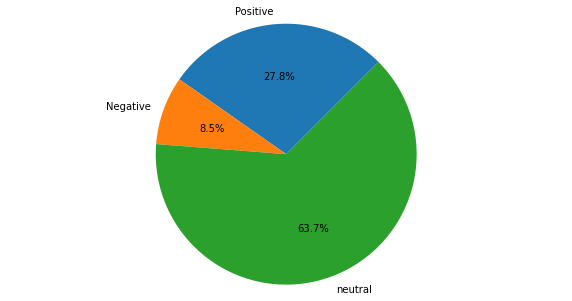

In [49]:
exp_vals = [Positive,Negative,Neutral]
exp_labels = ["Positive","Negative","neutral"]
    
fig2 = plt.figure(figsize = (10, 5))
plt.axis("equal")
plt.pie(exp_vals,labels=exp_labels, shadow=False, autopct='%2.1f%%',radius=1.2,explode=[0,0,0],counterclock=True, startangle=45)